# Identificar fronteras no lineales

In [1]:
#from sklearn.datasets.samples_generator import make_circles, make_blobs # Version anterior
from sklearn.datasets import make_circles, make_blobs

In [2]:
X, Y = make_circles(100, factor = .1, noise = .1) 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [4]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
        
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "blue");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

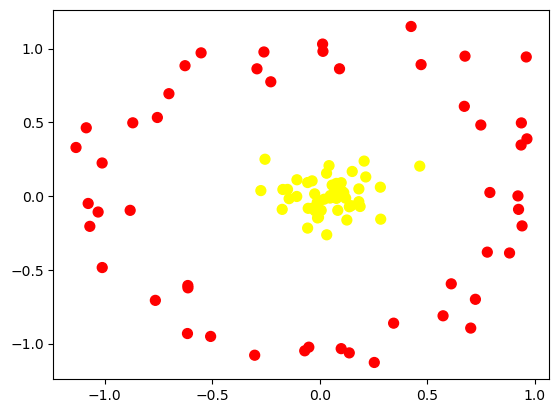

In [5]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

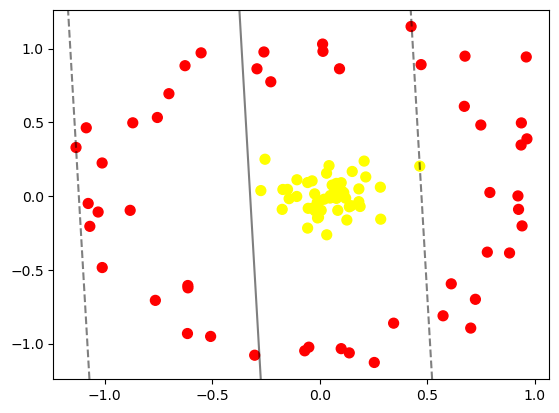

In [6]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

In [7]:
r = np.exp(-(X**2).sum(1))

In [8]:
r

array([0.93247532, 0.53394527, 0.36661721, 0.34960484, 0.46637027,
       0.99029475, 0.99913386, 0.99713294, 0.96906944, 0.98805183,
       0.9392578 , 0.99756446, 0.36020571, 0.36201895, 0.25771725,
       0.96610214, 0.98534682, 0.992132  , 0.36871477, 0.97530866,
       0.31725885, 0.22278655, 0.98705377, 0.38200829, 0.92639155,
       0.99117459, 0.95863743, 0.26291006, 0.98860694, 0.33995438,
       0.48278295, 0.99922435, 0.34596912, 0.42142808, 0.97465675,
       0.28520011, 0.34122378, 0.42545489, 0.95653856, 0.96210453,
       0.42710973, 0.99069216, 0.98377437, 0.33805225, 0.39497294,
       0.99820347, 0.95100149, 0.99752862, 0.30924123, 0.90030491,
       0.31273538, 0.98197868, 0.9058179 , 0.339599  , 0.16329291,
       0.88054856, 0.99376757, 0.77271172, 0.28750197, 0.98969341,
       0.28742402, 0.96053977, 0.47125227, 0.28389992, 0.45492633,
       0.97607753, 0.98816903, 0.47518385, 0.95061372, 0.36270037,
       0.98832498, 0.24788712, 0.27420285, 0.30523957, 0.43933

In [9]:
from mpl_toolkits import mplot3d

In [10]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0], X[:,1],r, c=Y, s= 50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")
    
    

In [11]:
from ipywidgets import interact, fixed

In [12]:
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], 
         azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150, 180], 
         X = fixed(X), Y = fixed(Y), r = fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 3.25085183e-02, -2.62403877e-01],
       [ 7.91756609e-01,  2.41540076e-02],
       [-8.70032871e-01,  4.96467329e-01],
       [-5.07946226e-02, -1.02390023e+00],
       [-6.13295146e-01, -6.21807413e-01],
       [-5.36441648e-02, -8.29153369e-02],
       [ 2.03526031e-02, -2.12671282e-02],
       [ 5.27914987e-02, -9.17806928e-03],
       [-1.71522172e-01,  4.47119000e-02],
       [ 1.08596947e-01,  1.50606717e-02],
       [ 2.14178141e-01,  1.29587858e-01],
       [ 4.92442339e-02,  3.67681328e-03],
       [-2.59723320e-01,  9.76536628e-01],
       [ 4.71654178e-01,  8.90842895e-01],
       [ 6.75956959e-01,  9.48142617e-01],
       [ 1.81769084e-01, -3.80226166e-02],
       [ 1.20644187e-01, -1.43729839e-02],
       [-3.45483852e-02, -8.18872916e-02],
       [ 9.37042057e-01,  3.45953894e-01],
       [ 3.17381587e-02,  1.54899879e-01],
       [ 1.37399151e-01, -1.06261881e+00],
       [ 4.25074417e-01,  1.14928364e+00],
       

In [13]:
rbf = SVC(kernel="rbf", C=1E6)
rbf.fit(X,Y)

SVC(C=1000000.0)

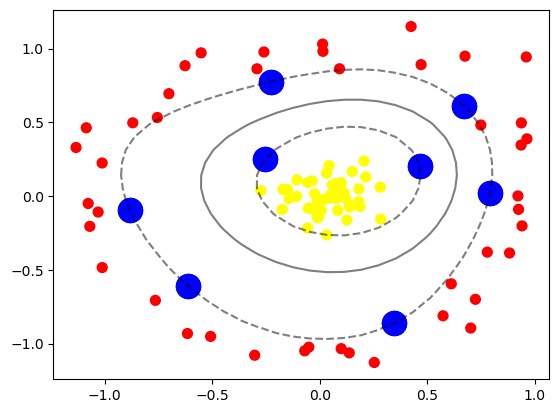

In [14]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="blue")

## Ajustar los parámetros de SVM

In [15]:
X, Y = make_blobs(n_samples=100, centers = 2, random_state=0, cluster_std=1.2)

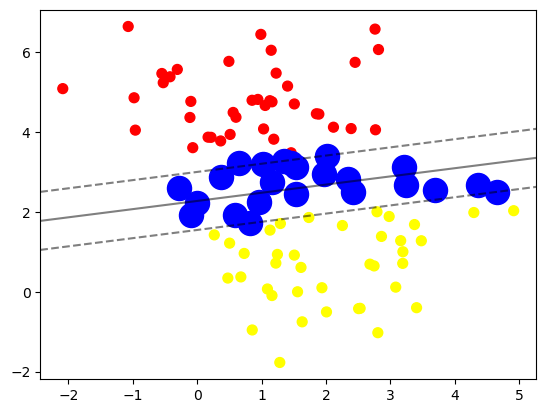

In [16]:
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")
model = SVC(kernel="linear", C=10)
model.fit(X,Y)
plt_svc(model)

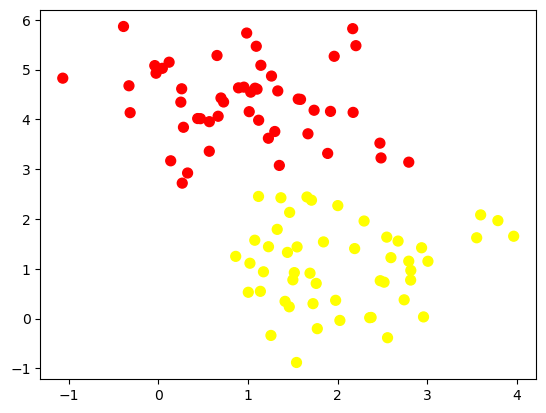

In [17]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")

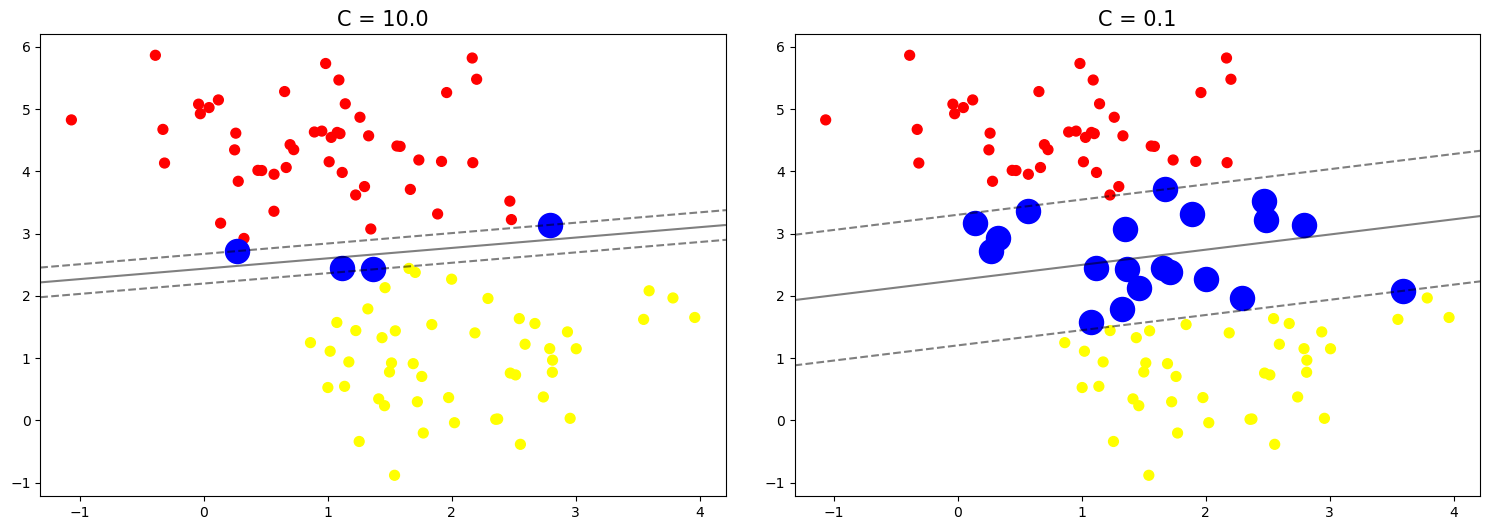

In [18]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left = 0.05, right = 0.95, wspace=0.1)

for ax_i, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1], c = Y, s = 50, cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size = 15)